In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.TabTransformer import TabTransformer

In [4]:
model = TabTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="classification",
    num_classes=1
    )

--- Preprocessing ---


10it [00:01,  9.79it/s]


In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
model.fit(model.training_dataset, epochs=100, validation_data=model.validation_dataset)



Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 4.8744 - accuracy: 0.6056 - val_loss: 1.1052 - val_accuracy: 0.5680
Epoch 2/100
1/1 [==============================] - 0s 161ms/step - loss: 0.9883 - accuracy: 0.6215 - val_loss: 0.7207 - val_accuracy: 0.6480
Epoch 3/100
1/1 [==============================] - 0s 149ms/step - loss: 0.7665 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6640
Epoch 4/100
1/1 [==============================] - 0s 155ms/step - loss: 0.6902 - accuracy: 0.6056 - val_loss: 0.6635 - val_accuracy: 0.6240
Epoch 5/100
1/1 [==============================] - 0s 150ms/step - loss: 0.6605 - accuracy: 0.6215 - val_loss: 0.7153 - val_accuracy: 0.4240
Epoch 6/100
1/1 [==============================] - 0s 149ms/step - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.7456 - val_accuracy: 0.3920
Epoch 7/100
1/1 [==============================] - 0s 147ms/step - loss: 0.7327 - accuracy: 0.4303 - val_loss: 0.7350 - val_accuracy: 0.4000
Epoch 8/100
1/1 

In [6]:
model.summary()

Model: "tab_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_transformer_encoder (T  multiple                  144484    
 abTransformerEncoder)                                           
                                                                 
 sequential_4 (Sequential)   (None, 56)                31752     
                                                                 
 dense_10 (Dense)            multiple                  57        
                                                                 
Total params: 176293 (688.64 KB)
Trainable params: 176293 (688.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 1s 730ms/step


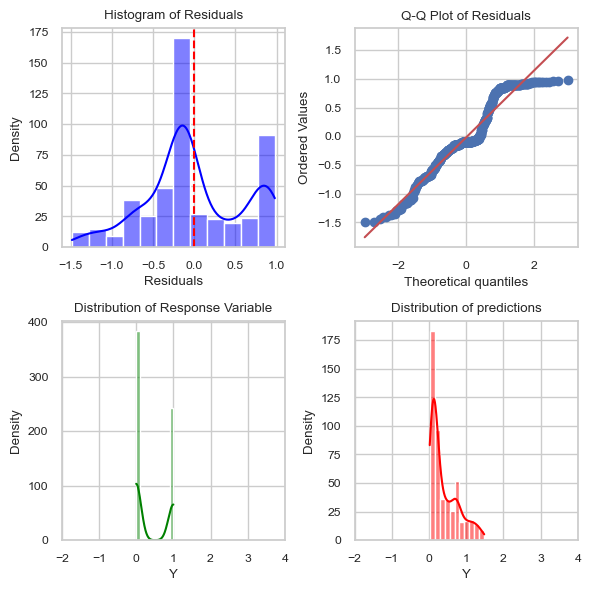

In [7]:
model.analytics_plot()